# Náhodný vektor
## Michal Béreš, Martina Litschmannová, Adéla Vrtková
---

# Příklad ze sbírky
Náhodný vektor $Z =(Y;X)^T$ má pravděpodobnostní funkci zadanou tabulkou

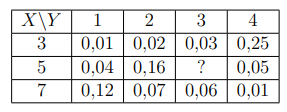
## a) Určete chybějící hodnotu sdružené pravděpodobnostní funkce,

In [ ]:
data <- c(
    0.01, 0.04, 0.12,
    0.02, 0.16, 0.07,
    0.03, 0, 0.06,
    0.25, 0.05, 0.01
)
P <- matrix(data, nrow = 3, ncol = 4) # případně byrow = ...
X <- c(3, 5, 7)
Y <- c(1, 2, 3, 4)
dimnames(P) <- list(X, Y)
P


In [ ]:
sum(P)


In [ ]:
# nespoštějte tuto buňku 2krát, jinak si hodnotu zase nastavíte na 0,
# víte proč?
p_5_3 <- 1 - sum(P)
P["5", "3"] <- p_5_3
P


## b) Určete distribuční funkci
**Pozor! Vektor Z je $(Y,X)^T$ tedy první parametr je hodnota Y a druhý hodnota X.**

In [ ]:
# F(2.8; 7.1)
# = P(Y<2.8,X<7.1)
P[X < 7.1, Y < 2.8]
sum(P[X < 7.1, Y < 2.8])


In [ ]:
F_x <- matrix(rep(0, 4 * 5), nrow = 4, ncol = 5)
dimnames(F_x) <- list(
    c("(-inf,3>", "(3,5>", "(5,7>", "(7,inf)"),
    c("(-inf,1>", "(1,2>", "(2,3>", "(3,4>", "(4,inf)")
)
F_x


In [ ]:
# projdeme řádky a sloupce, vždy si vezmeme jednu hodnotu
# z příslušného řádku nebo sloupce
x_vals <- c(3, 5, 7, 8)
y_vals <- c(1, 2, 3, 4, 5)
for (i in 1:4) {
    for (j in 1:5) {
        x <- x_vals[i]
        y <- y_vals[j]
        F_x[i, j] <- sum(P[X < x, Y < y])
    }
}
F_x


## c) Určete marginální rozdělení

In [ ]:
P_x <- rowSums(P)
P_x


In [ ]:
F_x <- c(0, cumsum(P_x))
F_x


In [ ]:
P_y <- colSums(P)
P_y


In [ ]:
F_y <- c(0, cumsum(P_y))
F_y


## d) Podmíněné pravděpodobnosti a podmíněné pravděpodobnostní funkce $P(x|y), P(y|x)$

In [ ]:
# P(Y > 2.1 | X < 5.3)
#  = P(Y > 2.1 ∧ X < 5.3) / P(X < 5.3)
sum(P[X < 5.3, Y > 2.1])
sum(P[X < 5.3, ])
sum(P[X < 5.3, Y > 2.1]) / sum(P[X < 5.3, ])


In [ ]:
# P(X = 5|Y = 1)
# = P(X = 5 ∧ Y = 1) / P(Y = 1)
P["5", "1"] / sum(P[, "1"])
P["5", "1"] / sum(P_y["1"])


**$P(x|y)=\frac{P(X=x,Y=y)}{P_Y(y)}$**

In [ ]:
P_xy <- P # má to stejnou velikost, tak si ukradneme formátování
X_lab <- c("3", "5", "7")
Y_lab <- c("1", "2", "3", "4")
for (x in X_lab) {
    for (y in Y_lab) {
        P_xy[x, y] <- P[x, y] / P_y[y]
    }
}
P_xy
colSums(P_xy)


**$P(y|x)$**

In [ ]:
P_yx <- P # má to stejnou velikost, tak si ukradneme formátování
for (x in X_lab) {
    for (y in Y_lab) {
        P_yx[x, y] <- P[x, y] / P_x[x]
    }
}
P_yx
rowSums(P_yx)


## e) zákládní charakteristiky náhodných veličin X a Y

In [ ]:
E_X <- sum(X * P_x)
E_X
E_XX <- sum(X * X * P_x)
D_X <- E_XX - E_X^2
D_X


In [ ]:
E_Y <- sum(Y * P_y)
E_Y
E_YY <- sum(Y * Y * P_y)
D_Y <- E_YY - E_Y^2
D_Y


## f) podmíněná střední hodnota  E(X|Y = 2)

In [ ]:
# P(x|Y=2)
P_xy[, "2"]
E_X_Y2 <- sum(X * P_xy[, "2"])
E_X_Y2


## g) kovariance a korelace

In [ ]:
X_Y <- P # matice kde v každé kolonce je hodnota x*y
for (x in X) {
    for (y in Y) {
        X_Y[x == X, y == Y] <- x * y
    }
}
X_Y


In [ ]:
# střední hodnota E(X*Y)
E_XY <- sum(X_Y * P)
E_XY


In [ ]:
# kovariance
cov_XY <- E_XY - E_X * E_Y
cov_XY


In [ ]:
# korelace
cov_XY / sqrt(D_X * D_Y)
